In [41]:
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style='darkgrid', context='talk')

results = pd.read_csv('results_pls.csv')
results.head(1)

,layer,score,score_error,model,region,effective_dimensionality_dataset,effective_dimensionality_imagenet
0,encode_1,0.233607,0.00383,resnet18-supervised,IT,18.064687,89.973592


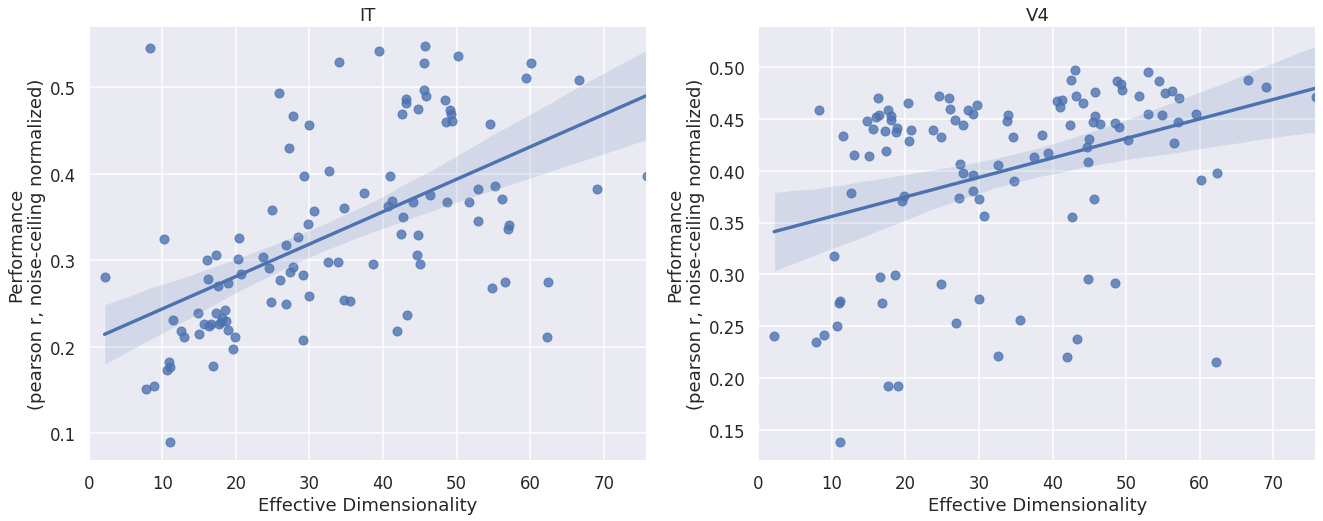

In [42]:
fig, axs = plt.subplots(1, 2, figsize=(22, 8))

sns.regplot(x='effective_dimensionality_dataset', y='score',
            data=results[results.region == 'IT'], ax=axs[0])
sns.regplot(x='effective_dimensionality_dataset', y='score',
            data=results[results.region == 'V4'], ax=axs[1])

axs[0].set(xlabel='Effective Dimensionality', ylabel='Performance\n(pearson r, noise-ceiling normalized)', title='IT',
          xlim=(0, None))
axs[1].set(xlabel='Effective Dimensionality', ylabel='Performance\n(pearson r, noise-ceiling normalized)', title='V4',
          xlim=(0, None))

plt.show()
fig.savefig('results.jpg')

In [40]:
it = results[results.region == 'IT']
it_imagenet_r, it_imagenet_p = stats.spearmanr(it.effective_dimensionality_imagenet, it.score)
it_dataset_r, it_dataset_p = stats.spearmanr(it.effective_dimensionality_dataset, it.score)

v4 = results[results.region == 'V4']
v4_imagenet_r, v4_imagenet_p = stats.pearsonr(v4.effective_dimensionality_imagenet, v4.score)
v4_dataset_r, v4_dataset_p = stats.pearsonr(v4.effective_dimensionality_dataset, v4.score)

correlations = pd.DataFrame({'Region': ['IT', 'IT', 'V4', 'V4'], 
                             'Effec. Dim. Set': ['ImageNet', 'Regressors', 'ImageNet', 'Regressors'], 
                             'Correlation': [it_imagenet_r, it_dataset_r, v4_imagenet_r, v4_dataset_r], 
                             'p-value': [it_imagenet_p, it_dataset_p, v4_imagenet_p, v4_dataset_p]})

correlations

,Region,Effec. Dim. Set,Correlation,p-value
0,IT,ImageNet,0.269586,4.585549e-03
1,IT,Regressors,0.575331,6.007376e-11
2,V4,ImageNet,0.401521,1.510022e-05
3,V4,Regressors,0.327496,5.087407e-04
